# TP 2. PARTIE 2. PDA - QDA. k-NN

In [2]:
print("Hello world!")

Hello world!


## 2. Dataset Vowel

Pour nos recherches, nous allons utiliser le jeu de données VOWEL, fourni avec la bibliothèque Sckit-learn.
Le jeu de données contient 10 classes de 48 instances chacune.

https://web.stanford.edu/~hastie/ElemStatLearn/data.html

## Plan :
   [- Naive Bayes](#1)

   [- LDA-QDA](#2)
      
   [- k-NN](#3)  
   
   [- Arbres de décision](#4)

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

Mais avant cela nous allons d'abord charger nos données qui sont sous le format CSV. Les données sont ensuite scindées en 2 jeux de données : celui d'apprentissage et celui de test.

In [5]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [6]:
test=pd.read_csv('vowel.test.csv', sep=',', index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


In [7]:
print ("Les dimensions du jeu de données d'apprentissage sont ",train.shape)
print ("Les dimensions du jeu de données test sont ",test.shape)

Les dimensions du jeu de données d'apprentissage sont  (528, 11)
Les dimensions du jeu de données test sont  (462, 11)


Retourne np.unique(...) les éléments uniques triés d'un tableau. Ici "y"correspond aux classes du jeu de données.

In [8]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

C'est un label discret. 
Il y a donc un problème de classification multi-classes avec 11 classes.
On vérifie si le nombre d'observation par classes (class balancing) est bien équilibré.

Text(0.5,1,"Représentation de la distribution 'y' du data train")

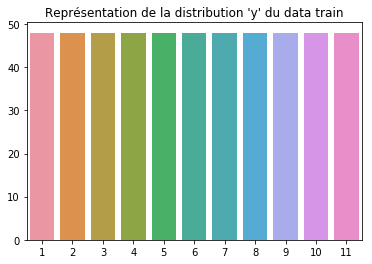

In [9]:
sns.barplot(np.unique(train['y']), train.groupby('y').count().values[:,0])
plt.title("Représentation de la distribution 'y' du data train")

Text(0.5,1,"Représentation de la distribution 'y' du data test")

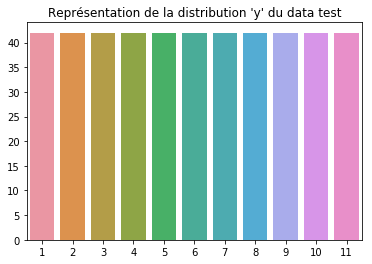

In [10]:
sns.barplot(np.unique(test['y']), test.groupby('y').count().values[:,0])
plt.title("Représentation de la distribution 'y' du data test")

Que ce soit pour le data test ou le data train les classes sont toujours bien équilibrées

In [11]:
y_train= train.values[:, 0 ]
x_train= train.values[:, 1:]
print("Les dimensions du data train sont les suivantes :",x_train.shape)

Les dimensions du data train sont les suivantes : (528, 10)


In [12]:
y_test= test.values[:,0]
x_test= test.values[:, 1:]
print("Les dimensions du data test sont les suivantes :",x_test.shape)

Les dimensions du data test sont les suivantes : (462, 10)


On a crée de nouveaux jeux de données train et test a partir des jeux de données originaux en ne prenant que les valeurs numériques.

### Machine Learning

On utilisera 3 différents algorithmes de classification sur le dataset Vowel.
Ensuite, nous comparerons  l'efficacité de ces 3 algorithmes en calculant la précision de la prédiction.

In [13]:
names = ["Naive Bayes", "LDA", "QDA", "Decision Tree Classifier"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier()]

### 1. Naive Bayes

Ici, nous allons utiliser le modèle GaussianNB, qui est déjà disponible dans la bibliothèque Sckit-learn.

In [14]:
NB= GaussianNB()

In [15]:
NB_fit=NB.fit(X=x_train, y=y_train)
print("Le score de précision  sur le train est ", ("%.3f" %accuracy_score(NB_fit.predict(x_train), y_train)))
print("Le score de précision sur le test est ", ("%.3f" %accuracy_score(NB_fit.predict(x_test), y_test)))

Le score de précision  sur le train est  0.720
Le score de précision sur le test est  0.461


### 2. LDA - QDA

Ici, nous allons utiliser le modèle LinearDiscriminantAnalysis et QuadraticDiscriminantAnalysis, qui sont  
également disponibles dans la bibliothèque Sckit-learn.

In [16]:
LDA= LinearDiscriminantAnalysis()

In [17]:
LDA_fit=LDA.fit(X=x_train, y=y_train)
print("Le score de précision sur le train est ", ("%.3f" %accuracy_score(LDA_fit.predict(x_train), y_train)))
print("Le score de précision sur le test est ", ("%.3f" %accuracy_score(LDA_fit.predict(x_test), y_test)))

Le score de précision sur le train est  0.684
Le score de précision sur le test est  0.444


In [18]:
QDA= QuadraticDiscriminantAnalysis()

In [19]:
QDA_fit=QDA.fit(X=x_train, y=y_train)
print("Le score de précision sur le train est ", ("%.3f" %accuracy_score(QDA_fit.predict(x_train), y_train)))
print("Le score de précision sur le test est " , ("%.3f" %accuracy_score(QDA_fit.predict(x_test), y_test)))

Le score de précision sur le train est  0.989
Le score de précision sur le test est  0.472


L'algorithme d'analyse discriminante quadratique est plus efficace que l'algorithme d'analyse discriminante linéaire : les scores de précision sont plus élévés notamment le score sur le train la différence de précision est assez significative.

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
### 3. k-NN

Utilisons l'algorithme k-NN pour différents k et comparons ses performances avec les méthodes précédentes.

L'algorithme k-NN nessécite de connaître k le nombre de voisins à considérer.

In [20]:
acc_train=[]
acc_test= []

for k in np.arange(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_fit= knn.fit(X= x_train, y= y_train)
    acc_train.append(accuracy_score(knn_fit.predict(x_train), y_train))
    acc_test.append(accuracy_score(knn_fit.predict(x_test), y_test))

In [21]:
k_hat= np.argmax(acc_test )
print ("Le meilleur nombre de voisins à considérer est donc le k à la position", k_hat, "donc pour k=6")
# au lieu de prendre la dernier valaur on va prendre la valeur au meilleur truc 

Le meilleur nombre de voisins à considérer est donc le k à la position 5 donc pour k=6


On va donc calculer les scores de précision pour le "meilleur" nombre de voisins à considérer. 

In [21]:
print("Les scores de précision train/ test sont respectivement", ("%.3f" % acc_train[k_hat]), "et",("%.3f" % acc_test[k_hat]) )

Les scores de précision train/ test sont respectivement 0.977 et 0.608


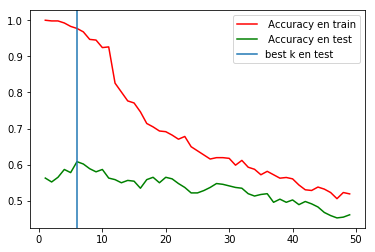

In [30]:
plt.plot(np.arange(1,50), acc_train,'r', label=" Accuracy en train")
plt.plot(np.arange(1,50), acc_test,'g', label= " Accuracy en test")
plt.axvline(np.arange(1,50)[k_hat], label= "best k en test")
plt.legend()

On peut voir sur la figure suivante que la précicion diminue graduellement pour k allant de 1 à 50. Tel que la figure le montre le meilleur score de précision sont bien 0.977 et 0.608 pour un k égal à 6.

## Conclusion 
L'algorithme de k-NN est donc plus efficace que les algorithme de Naives Bayes , LDA et QDA étant donné que les scores de précision sont plus proche de 1.

### 4. Arbres de décision (facultatif)

Ici, nous allons utiliser le modèle  DecisionTreeClassifier pour faire des arbres de décision par cross-validation

In [31]:
tree=DecisionTreeClassifier()
digit_tree=tree.fit(X= x_train, y= y_train)
print("Le score de précision sur le train est ", ("%.3f" %accuracy_score(digit_tree.predict(x_train), y_train)))
print("Le score de précision sur le test est " , ("%.3f" %accuracy_score(digit_tree.predict(x_test), y_test)))

Le score de précision sur le train est  1.000
Le score de précision sur le test est  0.431


In [32]:
param=[{"max_depth":list(range(2,10))}]
titan_tree= GridSearchCV(DecisionTreeClassifier(),
param,cv=5,n_jobs=-1)
titan_opt=titan_tree.fit(X= x_train, y= y_train)
print("Le score de précision sur le train est ", ("%.3f" %accuracy_score(titan_opt.predict(x_train), y_train)))
print("Le score de précision sur le test est " , ("%.3f" %accuracy_score(titan_opt.predict(x_test), y_test)))
# paramètre optimal
titan_opt.best_params_

Le score de précision sur le train est  0.769
Le score de précision sur le test est  0.426


{'max_depth': 6}

In [34]:
dot_data = StringIO()
export_graphviz(titan_tree, out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titan_tree.png")

AttributeError: 'list' object has no attribute 'write_png'